In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2022-09-22 21:27:02.830259: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-22 21:27:03.345605: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-22 21:27:03.345634: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-22 21:27:03.440189: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-22 21:27:04.804167: W tensorflow/stream_executor/platform/de

In [2]:
tf.__version__

'2.10.0'

In [3]:
tf.config.list_physical_devices("GPU")

2022-09-22 21:27:06.407569: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-09-22 21:27:06.407651: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-AOQNRBP): /proc/driver/nvidia/version does not exist


[]

In [4]:
gpu_available = tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2022-09-22 21:27:06.564329: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
tf.config.list_physical_devices('GPU')

[]

In [6]:
is_cuda_gpu_available = tf.test.is_gpu_available(cuda_only=True)

In [7]:
is_cuda_gpu_min_3 = tf.test.is_gpu_available(True, (3,0))

In [8]:
import keras as keras

In [9]:
fashion_mnist=keras.datasets.fashion_mnist

In [10]:
(train_images,train_labels),(test_images,test_lable)=fashion_mnist.load_data()

In [11]:
fdata=fashion_mnist.load_data()

In [12]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [13]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [14]:
print(train_images.shape)

(60000, 28, 28)


In [15]:
print(train_labels)

[9 0 0 ... 3 0 5]


In [16]:
print(test_images.shape)

(10000, 28, 28)


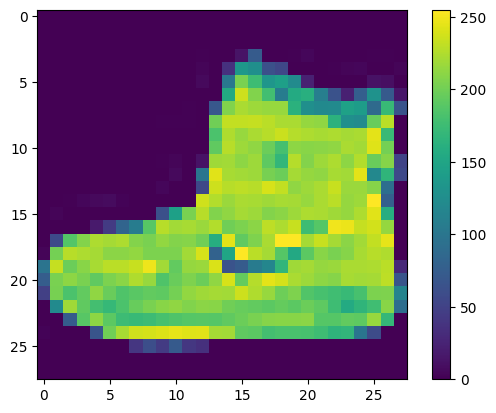

In [17]:
## visualise some data
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [18]:
## Pre-processing of the data
## we have to scale the image from 0-1 to feed it into the Neural Network that why devide by 255.0
train_images=train_images/255.0
test_images=test_images/255.0


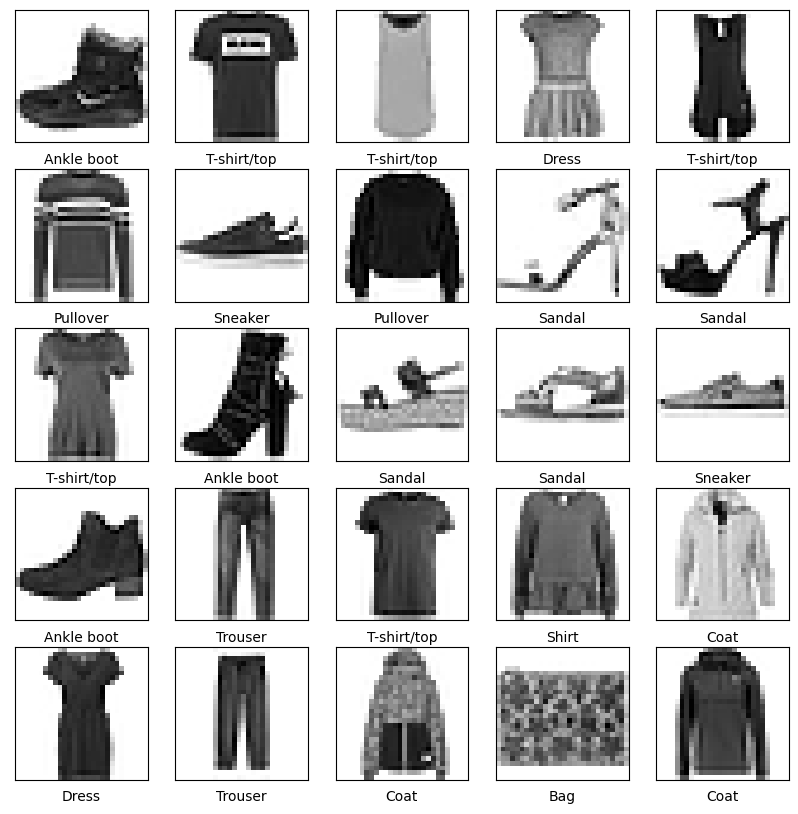

In [19]:
# Lets display some images
import pkgutil


plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    
plt.show()

In [20]:
# Setup the layers, This is just a DNN. No convo
model =tf.keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))

model.add(keras.layers.Dense(128*2, activation=tf.nn.relu))
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(64, activation=tf.nn.relu))
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))



In [21]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
## Model Training
model.fit(train_images,train_labels,epochs=10,batch_size=64)

## 1 run over entire dataset of 60000 -> 1 epoch
## epochs=10=> 10 iterations =>10 times w, b got updated

## bATCH SIZE 
## default batch_size=32 in keras, i.e
## o/p: 60000 / /64 =938
## 64 images * 938 batches in each epoch
## per Epoch, 938 ( weight, bias) update
## 10 epoch * 938= 9380 times, changes to update the w,b

Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 0.4963 - accuracy: 0.8219
Epoch 2/10
938/938 [==============================] - 2s 3ms/step - loss: 0.3623 - accuracy: 0.8674
Epoch 3/10
938/938 [==============================] - 2s 3ms/step - loss: 0.3254 - accuracy: 0.8797
Epoch 4/10
938/938 [==============================] - 2s 3ms/step - loss: 0.3056 - accuracy: 0.8865
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2859 - accuracy: 0.8930
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2698 - accuracy: 0.8987
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2597 - accuracy: 0.9022
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2473 - accuracy: 0.9068
Epoch 9/10
938/938 [==============================] - 2s 3ms/step - loss: 0.2393 - accuracy: 0.9095
Epoch 10/10
938/938 [==============================] - 2s 3ms/step - loss: 0.2282 - accuracy: 0.9131

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [24]:
## Evalucating Accuracy

test_loss, test_acc=model.evaluate(test_images,test_lable)
print("Test accuracy:", test_acc)

# 313/313 beacuse batch_size is 32 

313/313 [==============================] - 1s 1ms/step - loss: 0.3442 - accuracy: 0.8793
Test accuracy: 0.8792999982833862


In [25]:
## Making Predictions
predictions =model.predict(test_images)
predictions[0]

313/313 [==============================] - 0s 1ms/step


array([2.3215414e-06, 6.4908917e-08, 1.6441287e-07, 3.5072485e-06,
       1.8793440e-08, 2.6333118e-03, 3.1122795e-08, 1.1591208e-02,
       9.4122008e-08, 9.8576921e-01], dtype=float32)

In [26]:
np.argmax(predictions[0])
## this will get max arg from this array


9

In [27]:
test_lable[0]

9

In [28]:
# Now, Its time to look at the full set of 10 channels
def plot_images(i,predictions_array,true_label,img):
    predictions_array,true_label,img=predictions_array[i],true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap=plt.cm.binary)
    predicted_label=np.argmax(predictions_array)
    if(predicted_label==true_label):
        color='green'
    else:
        color='red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],100*np.max(predictions_array),class_names[true_label]),color=color)

In [29]:
def plot_value_array(i,predictions_array,true_label):
    predictions_array,true_label=predictions_array[i],true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot=plt.bar(range(10),predictions_array,color="#777777")
    plt.ylim([0,1])
    predicted_label=np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

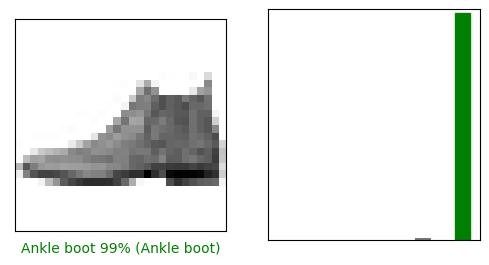

In [30]:
## Ledts look at the 0th and 10th image first
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_images(i,predictions,test_lable,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_lable)
plt.show()


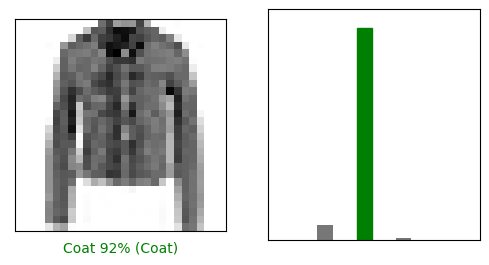

In [31]:
i=10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_images(i,predictions,test_lable,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_lable)
plt.show()


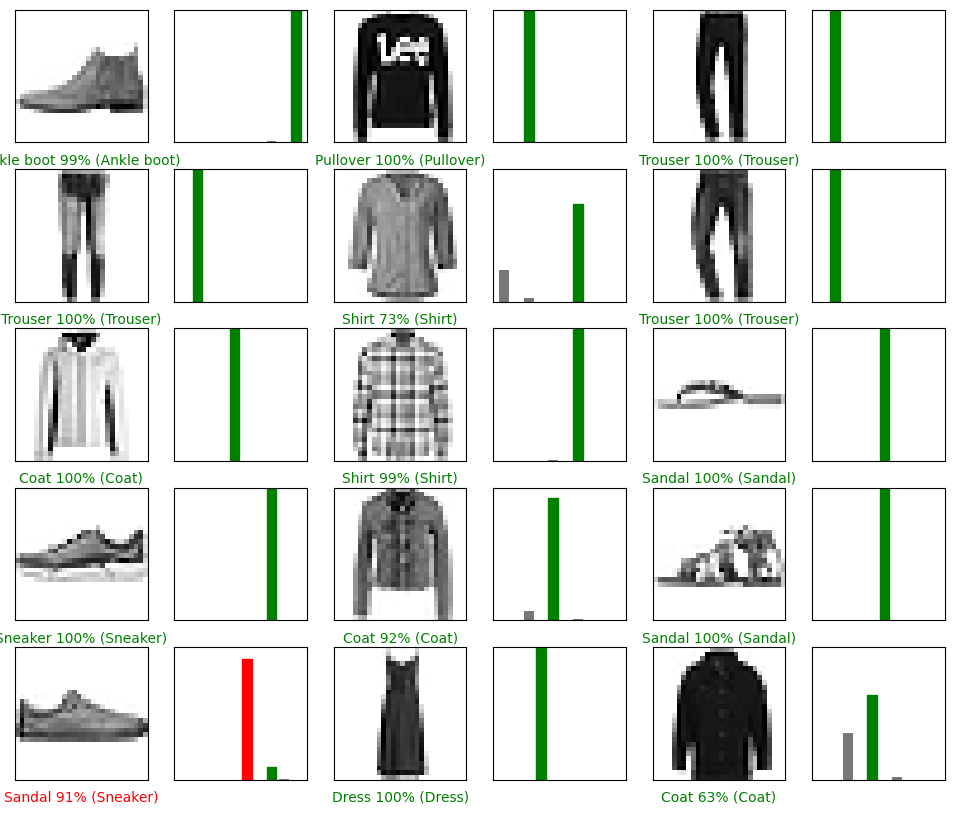

In [32]:
## Now lets plot several images and their predictions.
## Correct ones are green, while the incorrect one are red
num_rows=5
num_cols=3
num_images=num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_images(i,predictions,test_lable,test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i,predictions,test_lable)
plt.show()

In [37]:
#Finally, We will use the trained model to make prediction about a single image.
# Grab an image from the test dataset
img =test_images[0]
print(img.shape)

# Add the image to a batch where it's the only member
img= np.expand_dims(img,0)

print(img.shape)
prediction_single=model.predict(img)
print(prediction_single)


(28, 28)
(1, 28, 28)
1/1 [==============================] - 0s 19ms/step
[[2.3215462e-06 6.4908924e-08 1.6441288e-07 3.5072521e-06 1.8793441e-08
  2.6333134e-03 3.1122802e-08 1.1591205e-02 9.4122370e-08 9.8576933e-01]]


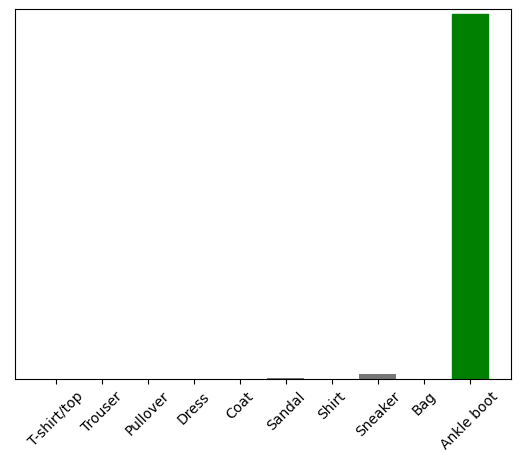

In [38]:
plot_value_array(0,prediction_single,test_lable)
plt.xticks(range(10),class_names,rotation=45)
plt.show()

In [39]:
## you can see the prediction for our only image in batch.
prediction_result=np.argmax(prediction_single[0])
prediction_result

9